In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt




In [7]:
def plotDataAndCov(data):
    ACov = np.cov(data, rowvar=False, bias=True)
    print('Covariance matrix:\n', ACov)
    
    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(10, 10)

    ax0 = plt.subplot(2, 2, 1)

    # Choosing the colors
    cmap = sns.color_palette("GnBu", 10)
    sns.heatmap(ACov, cmap=cmap, vmin=0)

    ax1 = plt.subplot(2, 2, 2)

    # data can include the colors
    if data.shape[1]==3:
        c=data[:,2]
    else:
        c="#0A98BE"
    ax1.scatter(data[:,0], data[:,1], c=c, s=40)

    # Remove the top and right axes from the data plot
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

In [8]:
np.random.seed(1234)
a1 = np.random.normal(2, 1, 300)
a2 = np.random.normal(1, 1, 300)
A = np.array([a1, a2]).T
A.shape

(300, 2)

In [9]:
A[:10,:]

array([[ 2.47143516,  1.52704645],
       [ 0.80902431,  1.7111124 ],
       [ 3.43270697,  0.78245452],
       [ 1.6873481 ,  3.63779121],
       [ 1.27941127, -0.74213763],
       [ 2.88716294,  0.90556519],
       [ 2.85958841,  2.43118375],
       [ 1.3634765 ,  1.59275845],
       [ 2.01569637,  1.1702969 ],
       [-0.24268495, -0.75170595]])

E:\skola\code\New folder\envs\ann2test\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\skola\code\New folder\envs\ann2test\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


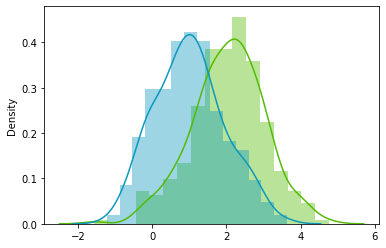

In [10]:
sns.distplot(A[:,0], color="#53BB04")
sns.distplot(A[:,1], color="#0A98BE")
plt.show()
plt.close()

Covariance matrix:
 [[ 0.95171641 -0.0447816 ]
 [-0.0447816   0.87959853]]


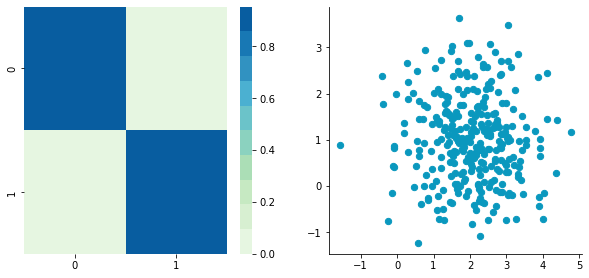

In [11]:
plotDataAndCov(A)
plt.show()
plt.close()

Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


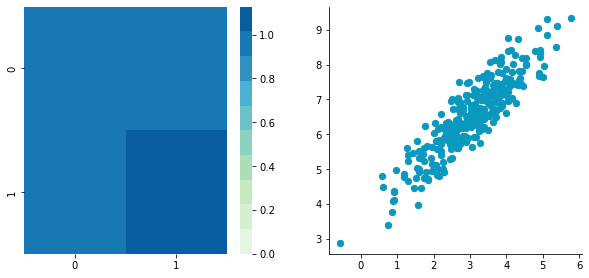

In [12]:
np.random.seed(1234)
b1 =  np.random.normal(3, 1, 300)
b2 = b1 + np.random.normal(7, 1, 300)/2.
B = np.array([b1, b2]).T
plotDataAndCov(B)
plt.show()
plt.close()

In [13]:
def center(X):
    newX = X - np.mean(X, axis = 0)
    return newX

Before:


Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


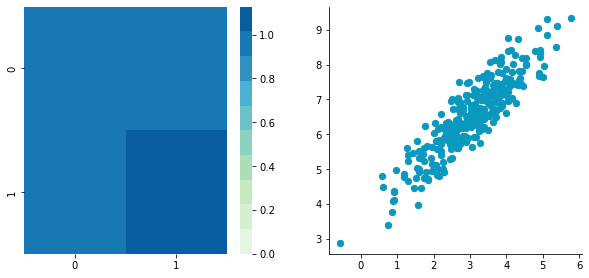

After:


Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


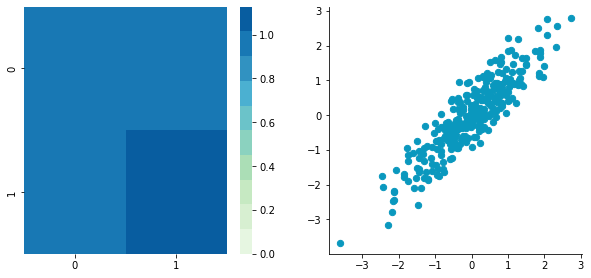

In [14]:
BCentered = center(B)

print ('Before:\n\n')

plotDataAndCov(B)
plt.show()
plt.close()

print ('After:\n\n')

plotDataAndCov(BCentered)
plt.show()
plt.close()

In [15]:
def standardize(X):
    newX = center(X)/np.std(X, axis = 0)
    return newX

Covariance matrix:
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


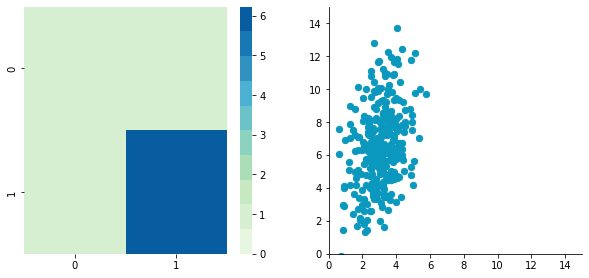

In [16]:
np.random.seed(1234)
c1 =  np.random.normal(3, 1, 300)
c2 = c1 + np.random.normal(7, 5, 300)/2.
C = np.array([c1, c2]).T

plotDataAndCov(C)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.show()
plt.close()

Covariance matrix:
 [[1.         0.34500274]
 [0.34500274 1.        ]]


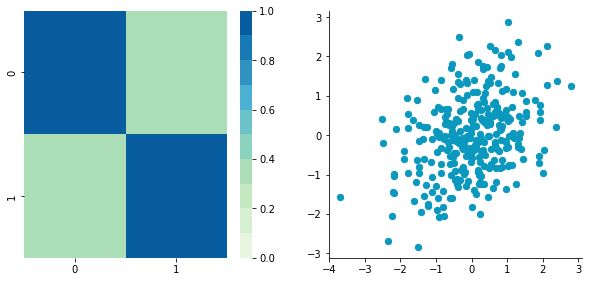

In [17]:
CStandardized = standardize(C)

plotDataAndCov(CStandardized)
plt.show()
plt.close()

Covariance matrix:
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


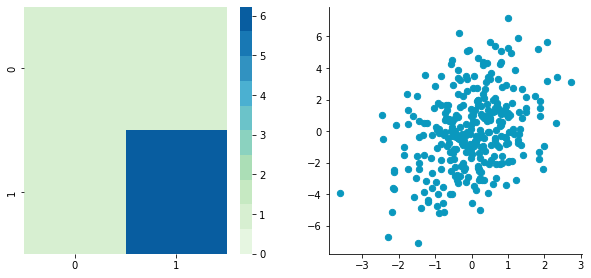

In [18]:
CCentered = center(C)

plotDataAndCov(CCentered)
plt.show()
plt.close()

In [19]:
def decorrelate(X):
    XCentered = center(X)
    cov = XCentered.T.dot(XCentered)/float(XCentered.shape[0])
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    # Apply the eigenvectors to X
    decorrelated = X.dot(eigVecs)
    return decorrelated

Covariance matrix:
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


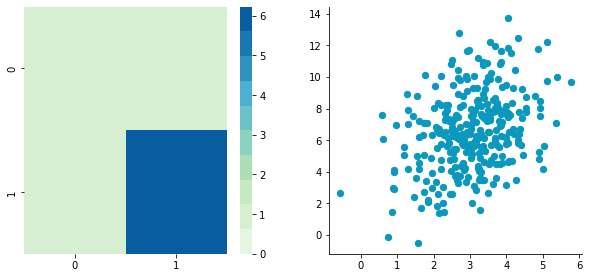

Covariance matrix:
 [[ 8.21222171e-01 -1.56911521e-16]
 [-1.56911521e-16  6.35579346e+00]]


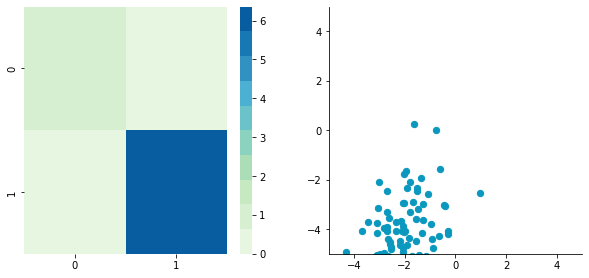

In [20]:
plotDataAndCov(C)
plt.show()
plt.close()

CDecorrelated = decorrelate(C)
plotDataAndCov(CDecorrelated)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()
plt.close()

In [21]:
def whiten(X):
    XCentered = center(X)
    cov = XCentered.T.dot(XCentered)/float(XCentered.shape[0])
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    # Apply the eigenvectors to X
    decorrelated = X.dot(eigVecs)
    # Rescale the decorrelated data
    whitened = decorrelated / np.sqrt(eigVals + 1e-5)
    return whitened

Covariance matrix:
 [[ 9.99987823e-01 -5.77315973e-17]
 [-5.77315973e-17  9.99998427e-01]]


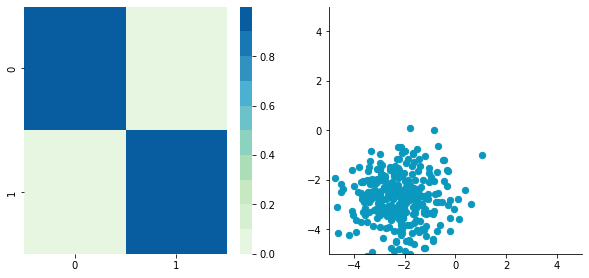

In [22]:
CWhitened = whiten(C)

plotDataAndCov(CWhitened)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()
plt.close()


In [32]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape

NameError: name 'test' is not defined

In [24]:
X = X_train[:1000]
print (X.shape)

(1000, 32, 32, 3)


In [25]:
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
print (X.shape)

(1000, 3072)


In [26]:
def plotImage(X):
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(X.reshape(32,32,3))
    plt.show()
    plt.close()

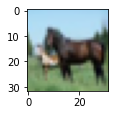

In [27]:
plotImage(X[12, :])


In [28]:
X_norm = X / 255.
print ('X.min()', X_norm.min())
print ('X.max()', X_norm.max())

X.min() 0.0
X.max() 1.0


In [29]:
X_norm.mean(axis=0).shape

(3072,)

In [30]:
X_norm.mean(axis=0)

array([0.5234    , 0.54323137, 0.5274    , ..., 0.50369804, 0.50011765,
       0.45227451])

In [31]:
X_norm = X_norm - X_norm.mean(axis=0)
X_norm.mean(axis=0)


array([-5.30575583e-16, -5.98021632e-16, -4.23439062e-16, ...,
       -1.81965554e-16, -2.49800181e-16,  3.98570066e-17])